In [3]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer

import pandas as pd

In [24]:
# Load the review dataset
review_df = pd.read_csv("reviews.csv")

print(len(review_df))
# Display the first few rows
print(review_df.head())

595
                                             Title  \
0           The 9/10 movie I'll never watch again.   
1                                Thank You Captain   
2           Anti-conformity at its most inspiring.   
3                A powerful antidote to conformism   
4  Seize the Day- One of the Greatest Movies Ever!   

                                              Review  Rating  
0  Personal Rating: 9/10\n\nThis movie shattered ...       9  
1  It was with a sad reason that I re watched Dea...       9  
2  Do not go where society tells you to. Find the...       9  
3  There are certain films that get under your sk...      10  
4  Dead Poets Scoiety. I suppose if you were in H...      10  


In [14]:
# Download VADER if not already available
nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(review):
    score = sia.polarity_scores(review)
    return score

# Apply sentiment analysis
review_df['Sentiment'] = review_df['Review'].apply(get_sentiment)

# Display results
print(review_df[['Review', 'Sentiment', 'Rating']].head(15))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/botto/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               Review  \
0   Personal Rating: 9/10\n\nThis movie shattered ...   
1   It was with a sad reason that I re watched Dea...   
2   Do not go where society tells you to. Find the...   
3   There are certain films that get under your sk...   
4   Dead Poets Scoiety. I suppose if you were in H...   
5   First of all, this is movie is my all-time fav...   
6   So today is August 12th and news has broken of...   
7   After all these years I have never seen this f...   
8   Australian director Peter Weir's third picture...   
9   Dead Poets Society is, to use a cliché, a cine...   
10  Not only will this movie touch your heart and ...   
11  A rare 10/10 and it's deserving of such. This ...   
12  The film Dead Poets Society is a film that exp...   
13  English teacher John Keating (Robin Williams) ...   
14  I watched this movie today for about 15-th tim...   

                                            Sentiment  Rating  
0   {'neg': 0.072, 'neu

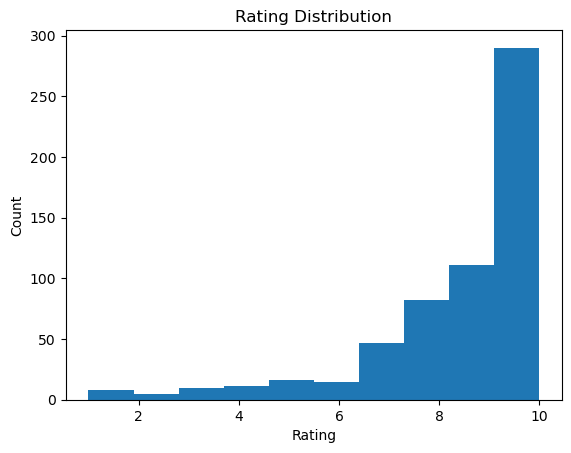

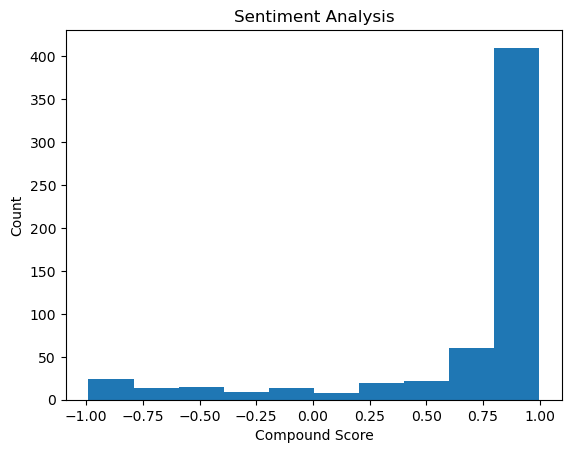

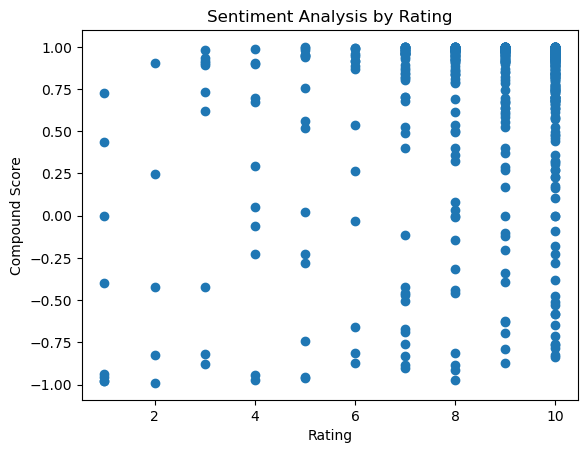

In [21]:
# Plot the sentiment scores
import matplotlib.pyplot as plt

# Extract the compound score
review_df['Compound'] = review_df['Sentiment'].apply(lambda x: x['compound'])

# Plot the ratings
plt.hist(review_df['Rating'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

# Plot the compound score
plt.hist(review_df['Compound'])
plt.xlabel('Compound Score')
plt.ylabel('Count')
plt.title('Sentiment Analysis')
plt.show()

# Plot the compound score by rating
plt.scatter(review_df['Rating'], review_df['Compound'])
plt.xlabel('Rating')
plt.ylabel('Compound Score')
plt.title('Sentiment Analysis by Rating')
plt.show()

In [17]:
#Fit a linear regression model to predict the rating based on the sentiment scores
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy

# Extract sentiment scores
sentiments = review_df['Sentiment'].apply(pd.Series)
sentiments.columns = ['Neg', 'Neu', 'Pos', 'Compound']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(sentiments, review_df['Rating'], test_size=0.2, random_state=0)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, y_pred))

Mean Squared Error: 2.853678088727668
Mean Absolute Percentage Error: 0.25579019834544486


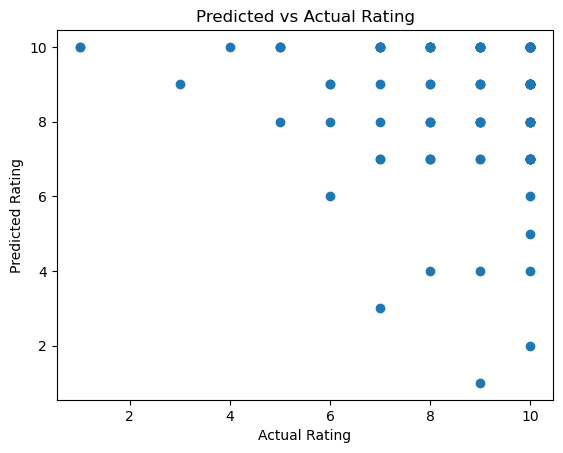

In [23]:
# Plot the predicted vs actual ratings
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Predicted vs Actual Rating')
plt.show()

In [18]:
# Fit a Neural Network model to predict the rating based on the sentiment scores
from sklearn.neural_network import MLPRegressor

# Fit the model
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=0)
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, y_pred))

Mean Squared Error: 2.6753422493839722
Mean Absolute Percentage Error: 0.2396495726507946


In [19]:
# Fit a Decision Tree model to predict the rating based on the sentiment scores
from sklearn.tree import DecisionTreeRegressor

# Fit the model
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, y_pred))

Mean Squared Error: 6.915966386554622
Mean Absolute Percentage Error: 0.36238161931439244


In [25]:
# Fit a Random Forest model to predict the rating based on the sentiment scores
from sklearn.ensemble import RandomForestRegressor

# Fit the model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Predict the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, y_pred))

Mean Squared Error: 3.241034803644209
Mean Absolute Percentage Error: 0.25381205148726155
